In [1]:
import sys
sys.path.append("/home/b/b380887/cold-point-overshoot/python_scripts/")

import bin_obs_overshoot as boo


In [2]:
save_dir = "/home/b/b380887/cold-point-overshoot/plots/obs_paper/"
pickle_dir = "/home/b/b380887/cold-point-overshoot/pickle_files/binned_by_tb/"
obs_dir = "/work/bb1153/b380887/big_obs_climo/"


In [3]:
region = "ECP"
month = "JJA"
year = 2009 


In [10]:
import importlib
importlib.reload(boo)

<module 'bin_obs_overshoot' from '/home/b/b380887/cold-point-overshoot/python_scripts/bin_obs_overshoot.py'>

### Get the data to save the dictionaries & plot histograms

In [4]:
ds_iwc, tb = boo.get_data(month, year, region, tb_path=obs_dir)
tb_dar = boo.get_tb_dar(tb, ds_iwc)


In [5]:
# boo.joint_tb_cp_hist(tb, cpT, month, year, region, plot_type, offset=None)
                     

In [13]:
ndar = boo.count_dardar_retrievals(month, year, region, obs_dir)
tavg = boo.calc_avg_cold_point(month, year, region, file_path=obs_dir, return_cpT=False)
print(ndar, tavg)


532788 193.96881


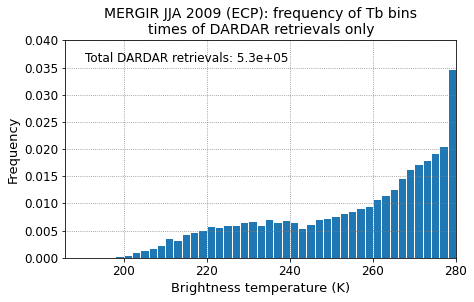

In [14]:
# Tb hist - dar times only 

boo.plot_tb_hist(tb_dar, month, region, year, dar_times_only=True, ylim=(0, 0.04),
                 save=True, save_dir=save_dir, dar_file_path=obs_dir)


[########################################] | 100% Completed | 20.4s


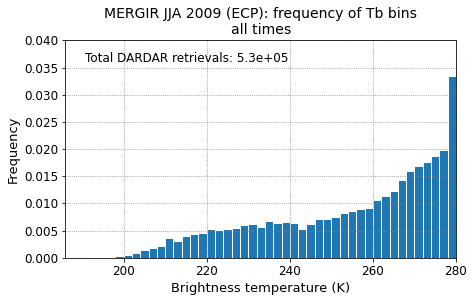

In [15]:
# Tb hist - all times

boo.plot_tb_hist(tb, month, region, year, dar_times_only=False, ylim=(0, 0.04),
                 save=True, save_dir=save_dir)


In [16]:
# do the binning

output = boo.bin_qi_by_tb(ds_iwc, tb_dar, save_dicts=True, pickle_dir=pickle_dir,
                           month=month, year=year, region=region)
qi_bin_means, qi_bin_counts, tb_bins = output


## Plot from the saved dictionaries!

In [4]:
region_list = ["WPC", "AFR", "ECP"]


In [5]:
bin_means_dict = {}
bin_counts_dict = {}
tb_dar_dict = {}

for region in region_list:
    ds_iwc, tb = boo.get_data(month, year, region, tb_path=obs_dir)
    tb_dar_dict[region] = boo.get_tb_dar(tb, ds_iwc)
    bin_means_dict[region], bin_counts_dict[region] = boo.load_saved_dicts(month, region, year, pickle_dir)


In [6]:
ndar_dict = {}
cpT_avg_dict = {}

for region in region_list:
    ndar_dict[region] = boo.count_dardar_retrievals(month, year, region, obs_dir)
    cpT_avg_dict[region] = boo.calc_avg_cold_point(month, year, region, return_cpT=False, file_path=obs_dir)

print(ndar_dict)
print(cpT_avg_dict)


{'WPC': 547923, 'AFR': 552104, 'ECP': 532788}
{'WPC': array(192.72574, dtype=float32), 'AFR': array(194.30179, dtype=float32), 'ECP': array(193.96881, dtype=float32)}


### Get the threshold

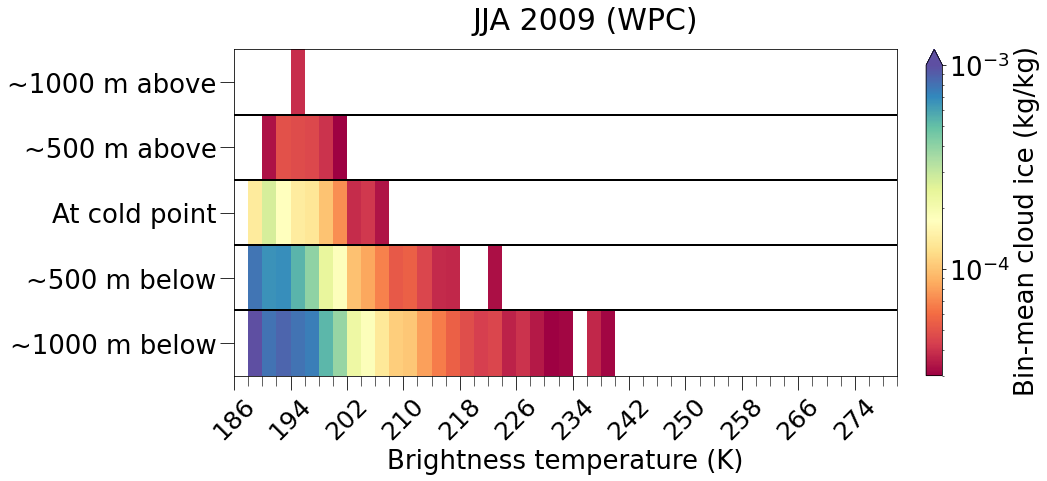

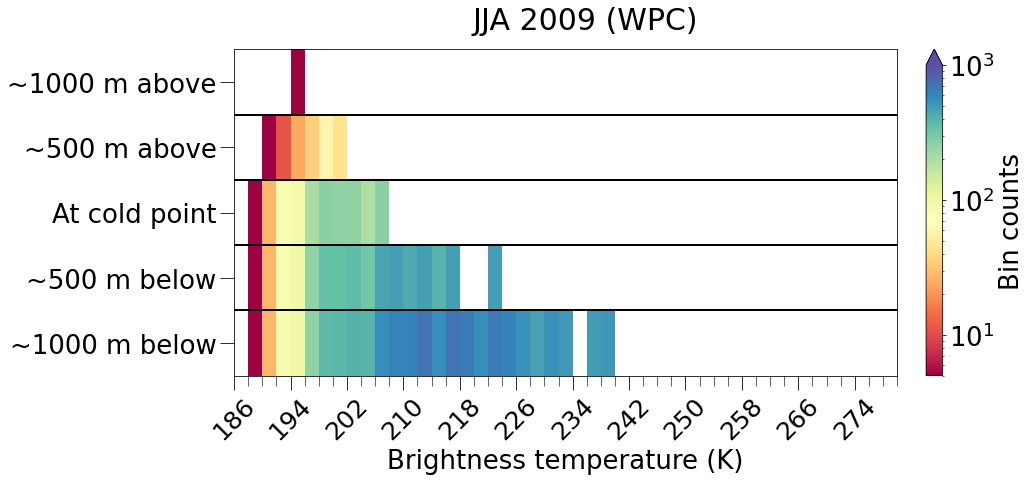

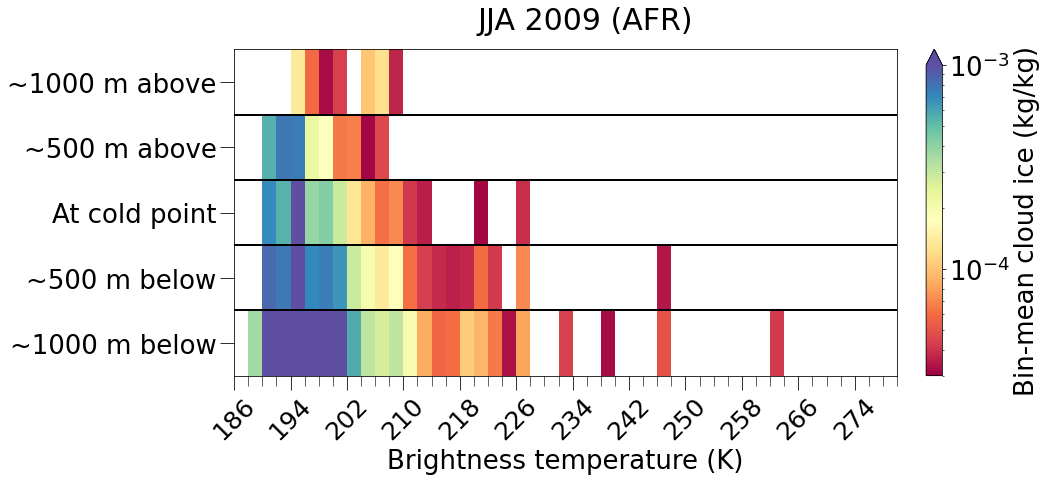

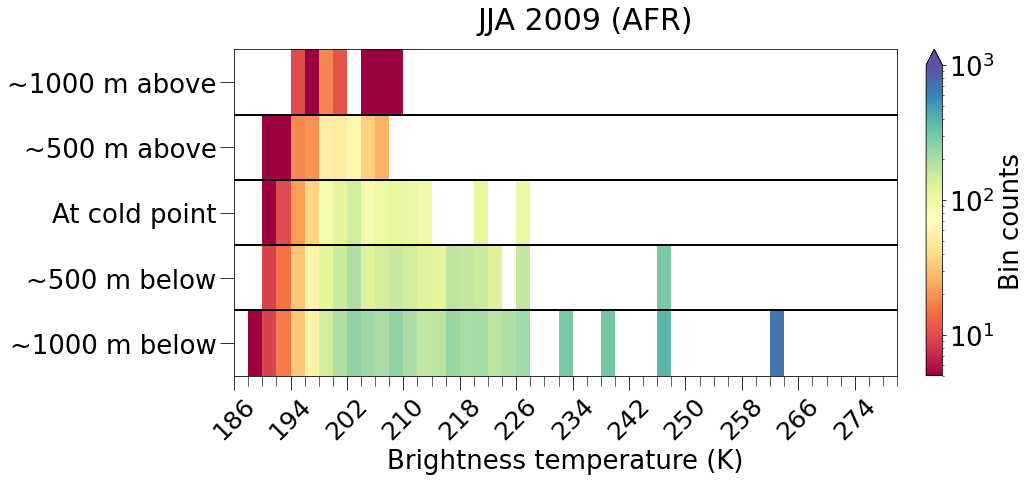

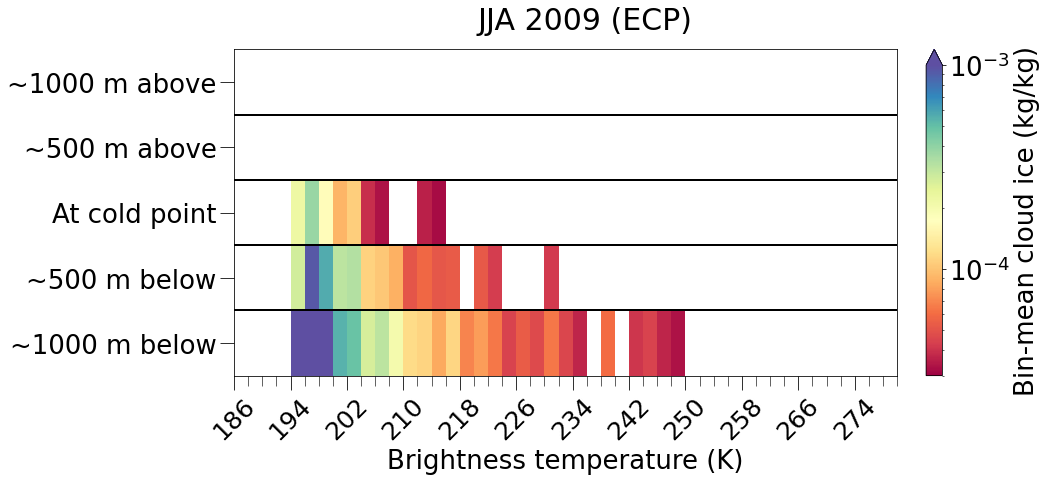

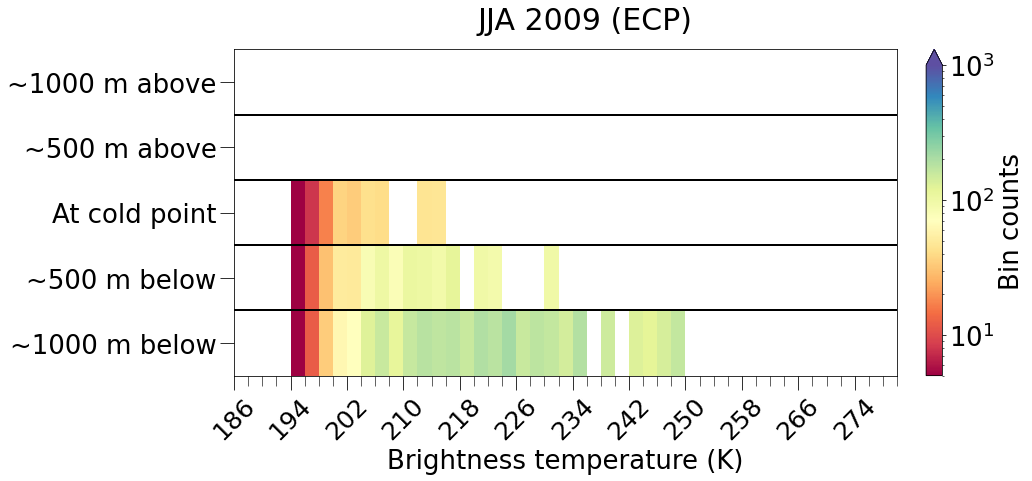

In [7]:
# w/o in situ
for region in region_list:
    boo.plot_binned_by_tb(bin_means_dict[region], tb_dar_dict[region], "mean", month, region, year,
                          cut_in_situ=True, save=True, save_dir=save_dir)
    boo.plot_binned_by_tb(bin_counts_dict[region], tb_dar_dict[region], "count", month, region, year,
                          cut_in_situ=True, save=True, save_dir=save_dir)
    

### Get the joint hists

# TODO: can do the dardar-rel ones here
if you do tb.sel(time=ds_iwc.time).resample(time="1h").mean() and then reindexx

# TODO... it comes from the regridded file....

In [12]:
import importlib
importlib.reload(boo)

<module 'bin_obs_overshoot' from '/home/b/b380887/cold-point-overshoot/python_scripts/bin_obs_overshoot.py'>

In [5]:
ds_iwc, tb = boo.get_data(month, year, region, tb_path=obs_dir)


In [18]:
tb_sort = tb.sortby("time")

In [14]:
%%time
tb_hrly, cpT_ri = boo.get_tb_and_cp_ri(month, year, region, file_path=obs_dir)
tb_hrly_dar, cpT_ri_dar = boo.get_tb_and_cp_ri(month, year, region,
                                               True, ds_iwc, file_path=obs_dir)


ValueError: index must be monotonic for resampling

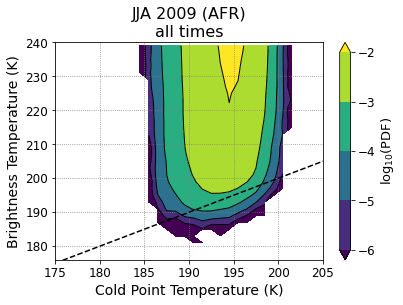

CPU times: user 456 ms, sys: 356 ms, total: 811 ms
Wall time: 376 ms


In [10]:
%%time
boo.joint_tb_cp_hist(tb_hrly_dar, cpT_ri_dar, month, year, region, "contourf", 
                     dar_times_only=True, offset=None, save=True, save_dir=save_dir, save_hist=True)
# boo.joint_tb_cp_hist(None, None, month, year, region, "contourf", 
#                      offset=None, save=True, save_dir=save_dir, save_hist=True)


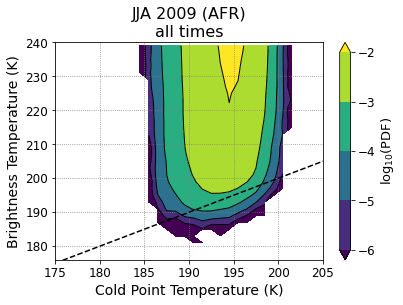

CPU times: user 456 ms, sys: 356 ms, total: 811 ms
Wall time: 376 ms


In [10]:
%%time
# boo.joint_tb_cp_hist(tb_hrly, cpT_ri, month, year, region, "contourf", 
#                      offset=None, save=True, save_dir=save_dir, save_hist=True)
boo.joint_tb_cp_hist(None, None, month, year, region, "contourf", 
                     offset=None, save=True, save_dir=save_dir, save_hist=True)


### Compare full w/ cutting off in-situ

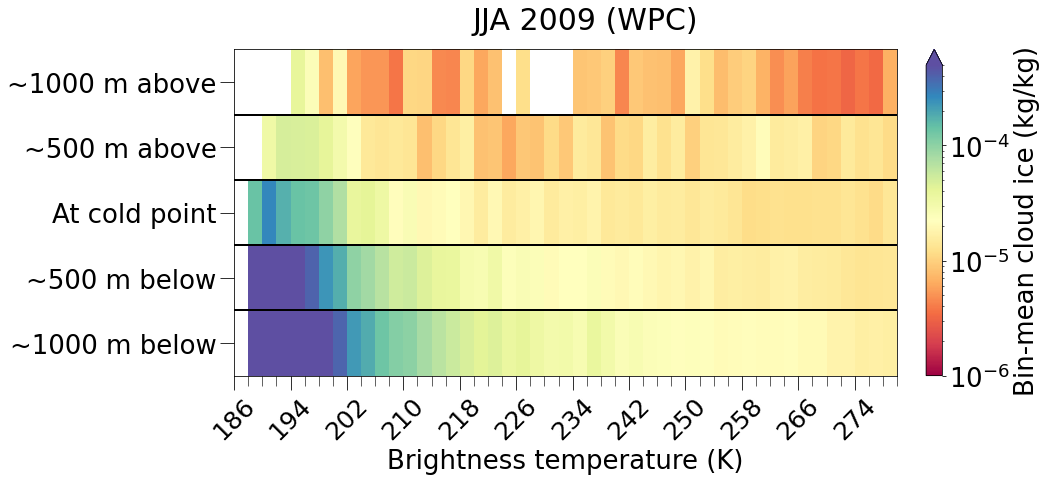

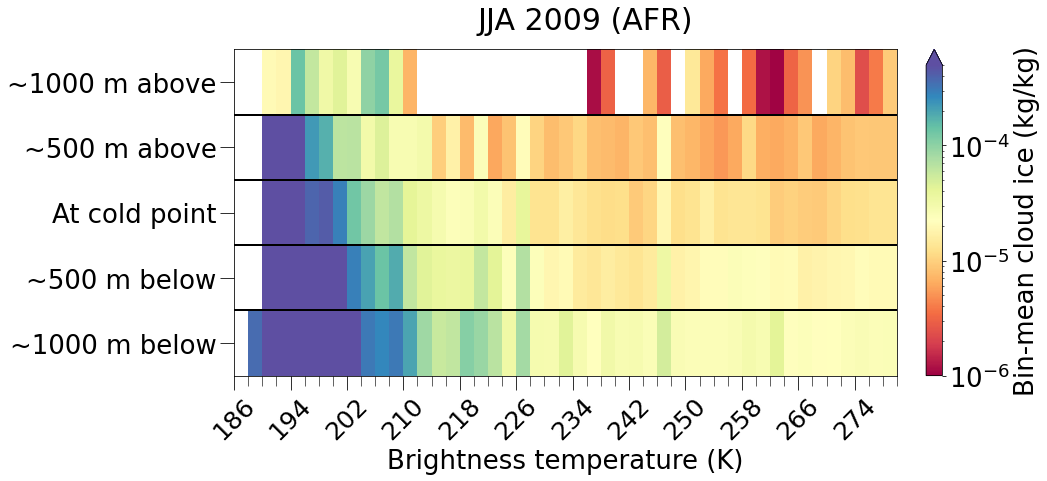

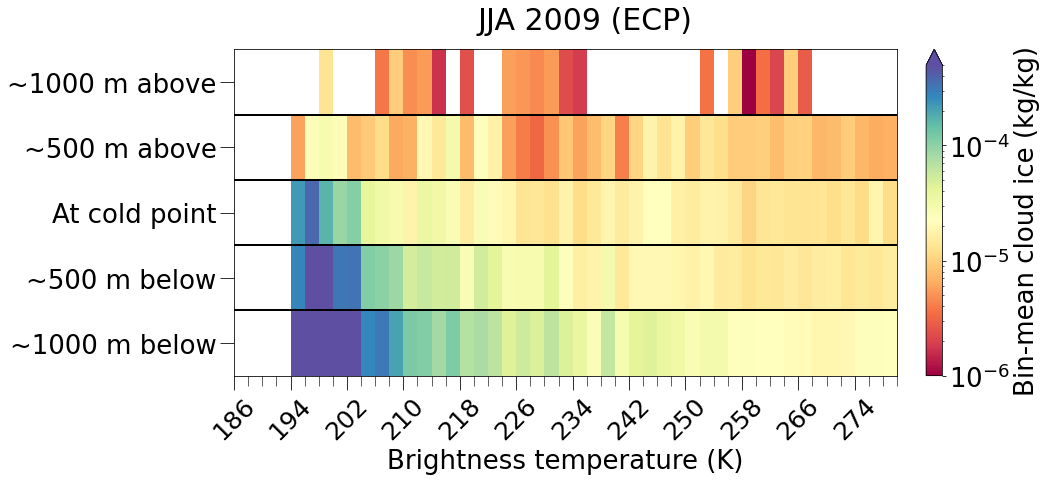

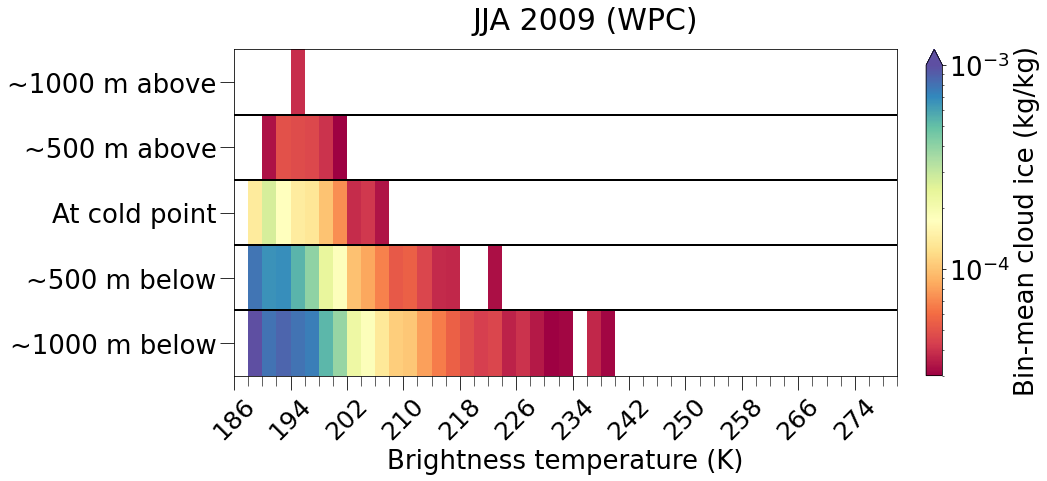

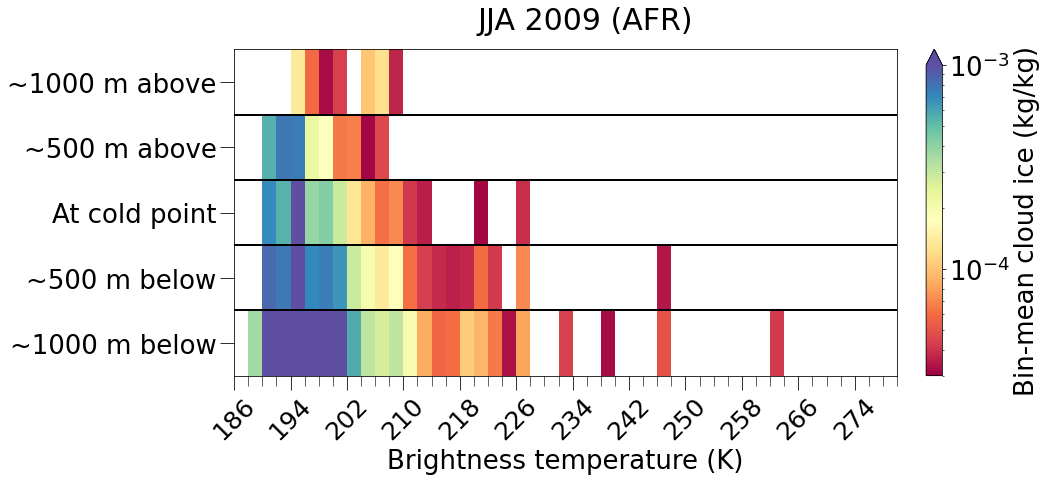

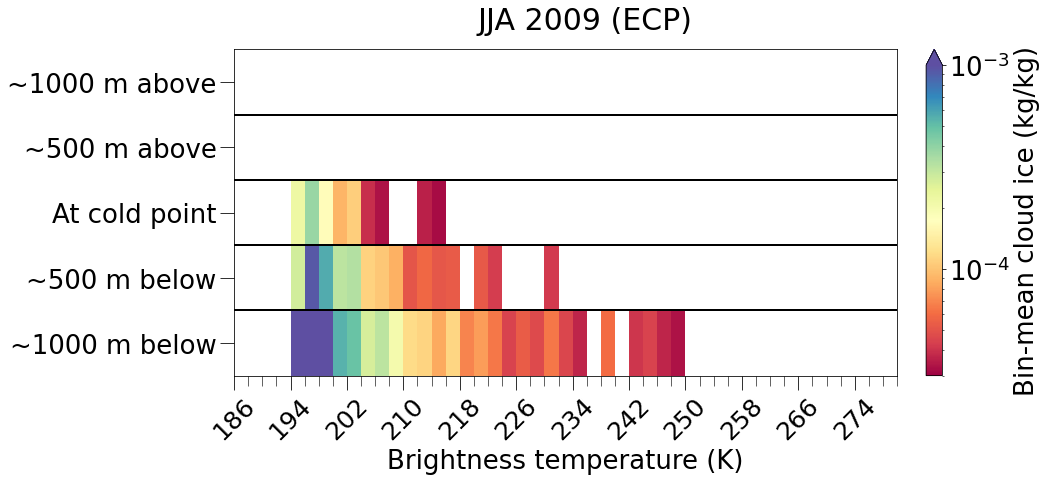

In [8]:
# means
for region in region_list:
    boo.plot_binned_by_tb(bin_means_dict[region], tb_dar_dict[region], "mean", month, region, year,
                          save=True, save_dir=save_dir)
# no-in-situ means
for region in region_list:
    boo.plot_binned_by_tb(bin_means_dict[region], tb_dar_dict[region], "mean", month, region, year,
                          cut_in_situ=True, save=True, save_dir=save_dir)


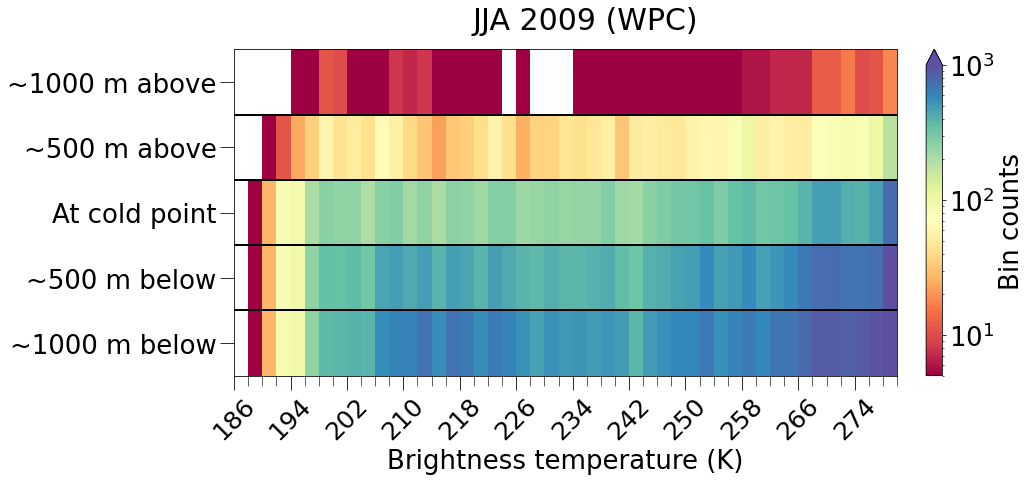

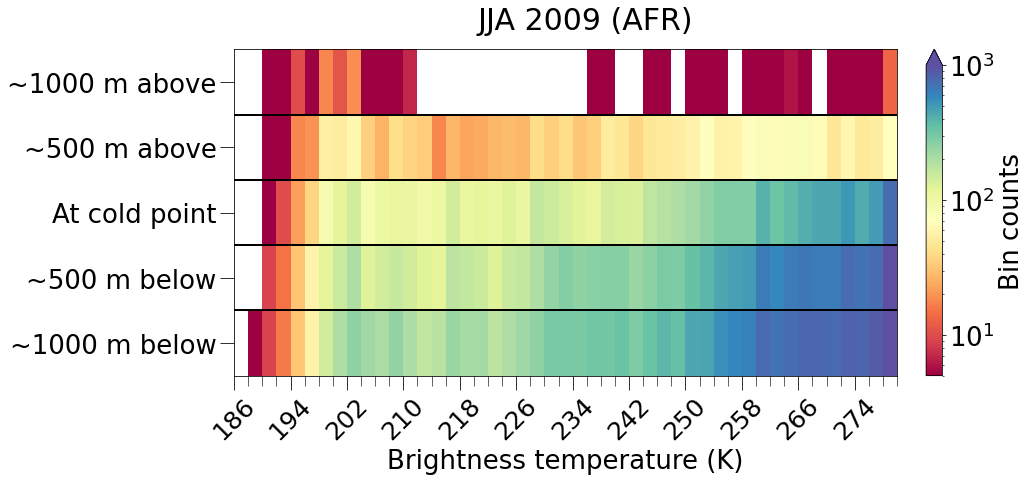

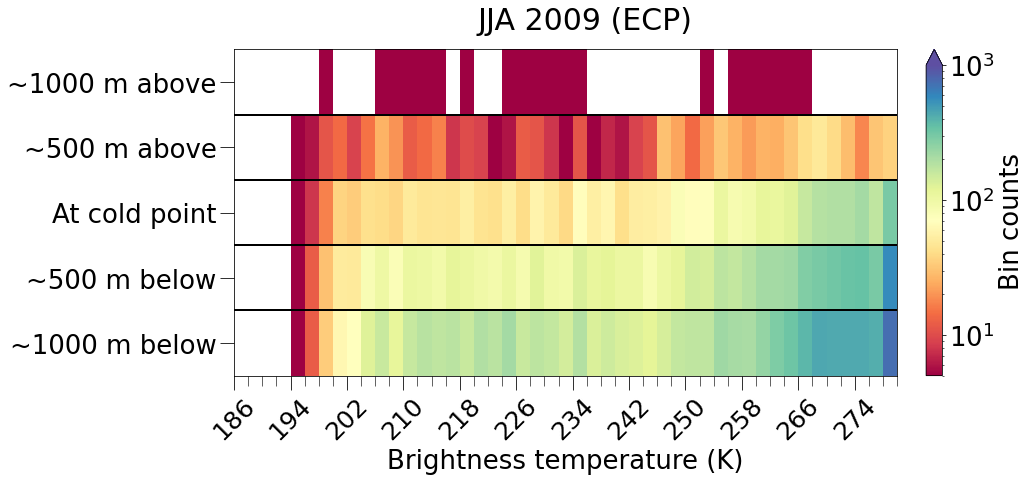

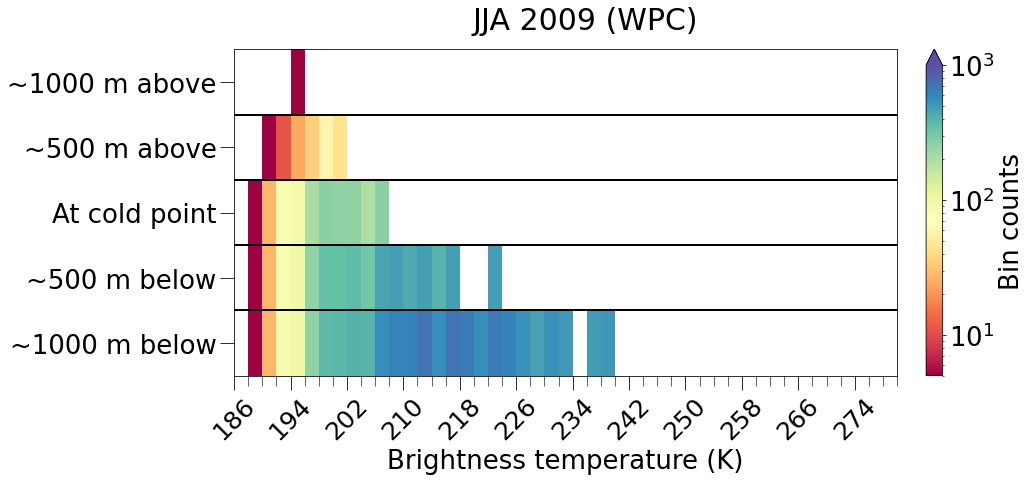

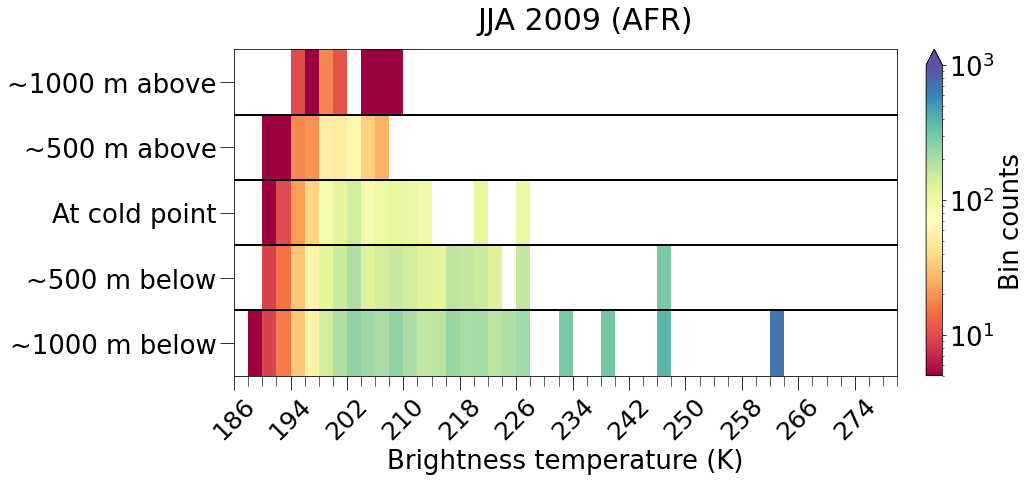

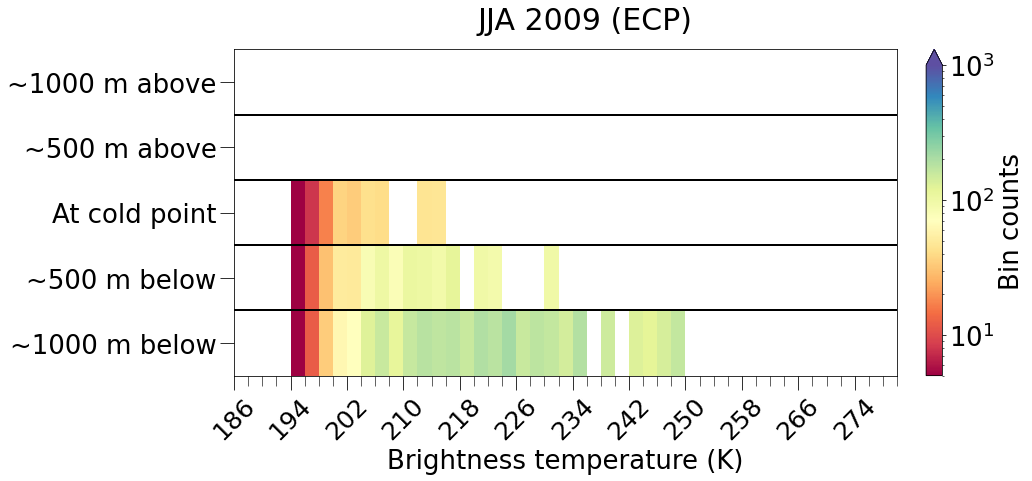

In [9]:
# counts
for region in region_list:
    boo.plot_binned_by_tb(bin_counts_dict[region], tb_dar_dict[region], "count", month, region, year,
                          save=True, save_dir=save_dir)
# no-in-situ counts
for region in region_list:
    boo.plot_binned_by_tb(bin_counts_dict[region], tb_dar_dict[region], "count", month, region, year,
                          cut_in_situ=True, save=True, save_dir=save_dir)
